**30E03000 - Data Science for Business I (2019)**

# Assignment 2: Credit Risk Modeling (template)

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#add all necessary libraries here

## Import data

In [3]:
#import the data into a Pandas dataframe and show it
data =pd.read_csv("credit.csv")
data.head(10).style

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,COAPPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0
5,6,3,36,2,0,0,0,0,1,0,9055,4,2,2,0,1,0,0,0,4,0,1,35,0,0,0,1,1,2,1,0,1
6,7,3,24,2,0,0,1,0,0,0,2835,2,4,3,0,1,0,0,0,4,0,0,53,0,0,1,1,2,1,0,0,1
7,8,1,36,2,0,1,0,0,0,0,6948,0,2,2,0,1,0,0,0,2,0,0,35,0,1,0,1,3,1,1,0,1
8,9,3,12,2,0,0,0,1,0,0,3059,3,3,2,1,0,0,0,0,4,1,0,61,0,0,1,1,1,1,0,0,1
9,10,1,30,4,1,0,0,0,0,0,5234,0,0,4,0,0,1,0,0,2,0,0,28,0,0,1,2,3,1,0,0,0


## Data exploration

In [4]:
#Explore the data
#data.describe()
data.info() # With this it can be seen that there is no missing data and all variables have int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIOTV             1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
COAPPLICANT         1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE           

In [10]:
## Data visualization

[700 300]


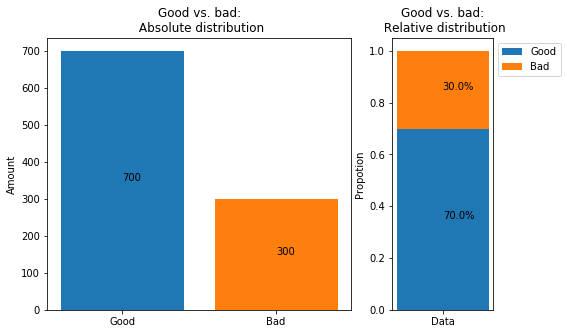

In [28]:
#Visualize 
one,zero = list(data["RESPONSE"]).count(1),list(data["RESPONSE"]).count(0) # amount of 1 and 0
lista = np.array([one,zero])
prop=lista/lista.sum()

print(lista)

fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Good', 'Bad'], lista, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Good vs. bad:\n Absolute distribution') 
ax0 = plt.ylabel('Amount')
ax0 = plt.text(['Good'], lista[0]/2, lista[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['Bad'], lista[1]/2, lista[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [prop[0]], label='Good')
ax1 = plt.bar(['Data'], [prop[1]], bottom=prop[0], label='Bad')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Good vs. bad:\n Relative distribution')
ax1 = plt.ylabel('Propotion')
ax1 = plt.text(['Data'],prop[0]/2, '{}%'.format((prop[0]*100).round(1)))
ax1 = plt.text(['Data'],(prop[1]/2)+prop[0], '{}%'.format((prop[1]*100).round(1)))


#plt.hist(zero)
plt.show()

19 75


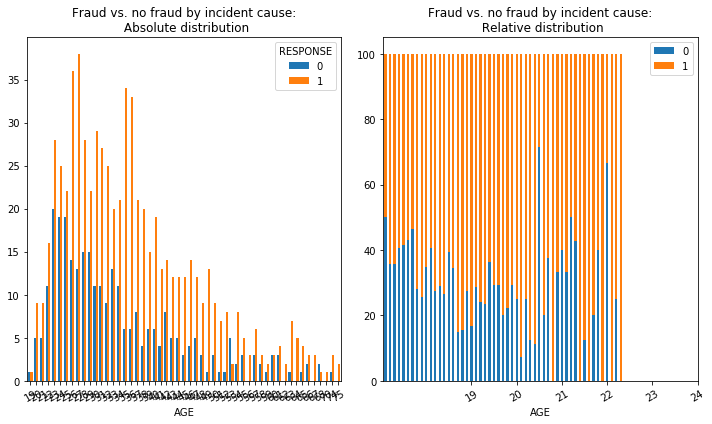

In [52]:
#Some random own visualization... not for the assignment
fig = plt.figure(figsize=(10, 6)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['AGE', 'RESPONSE'])['RESPONSE'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Fraud vs. no fraud by incident cause:\n Absolute distribution') 
#plt.xticks(data["AGE"].min(), data["AGE"].max(), steps = 10)

#plot bar labels
#for p in ax1.patches:
 #   ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['AGE','RESPONSE'])['RESPONSE'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Fraud vs. no fraud by incident cause:\n Relative distribution') 

plt.xticks(np.arange(data["AGE"].min(), data["AGE"].max(), step = 10))

print(data["AGE"].min(), data["AGE"].max())
#plot bar labels
#for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
 #   ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
  #  ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

## Data preprocessing

In [ ]:
#Preprocess the data into a feature matrix X and a target vector y

## Data split

In [ ]:
#Split

## Build an (unbalanced) Decision Tree model

## Rebalancing with SMOTE

## Build a balanced Decision Tree model

## Model evaluation

### 1. Confusion Matrix
### 2. ROC and AUC
### 3. Expected value framework (Excel)